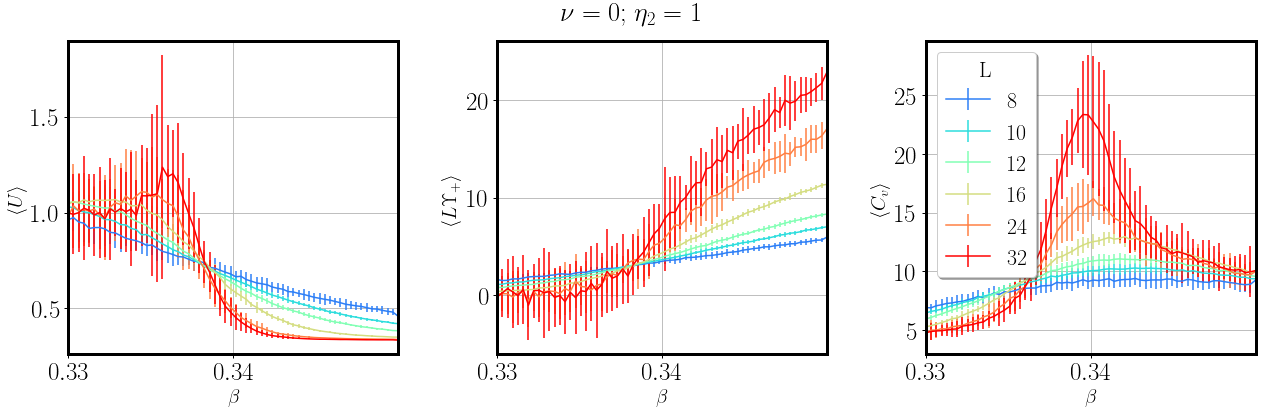

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


e=0
nu=0
h=1
rho=1
eta1=0
eta2=1
blow=0.33
bhigh=0.35
nMAX=30

LLIST=[8, 10, 12, 16, 24, 32]

BASEDIR=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures")

fig, ax1 = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,6))
fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$\langle U \rangle$")
ax1[1].set_ylabel(r"$\langle L\Upsilon_{+} \rangle$")
ax1[2].set_ylabel(r"$\langle C_v \rangle$")
ax1[0].set_xlim((0.33,0.35))
xticks = np.arange(0.33, 0.35, 0.01)
ax1[0].set_xticks(xticks)
ax1[0].grid()
ax1[1].grid()
ax1[2].grid()

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L, rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
       
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)
    
ax1[2].legend(loc="best", title="L")
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh) )



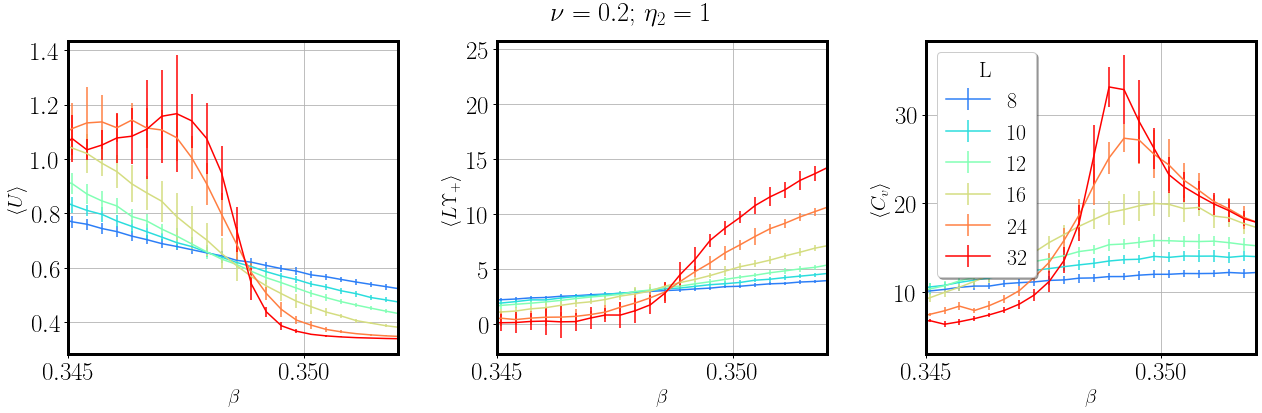

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


e=0
nu=0.2
h=1
rho=1
eta1=0
eta2=1
blow=0.34
bhigh=0.36
nMAX=30

LLIST=[8, 10, 12, 16, 24, 32]

BASEDIR=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures")

fig, ax1 = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,6))
fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$\langle U \rangle$")
ax1[1].set_ylabel(r"$\langle L\Upsilon_{+} \rangle$")
ax1[2].set_ylabel(r"$\langle C_v \rangle$")
ax1[0].set_xlim((0.345,0.352))
xticks = np.arange(0.345, 0.352, 0.005)
ax1[0].set_xticks(xticks)
ax1[0].grid()
ax1[1].grid()
ax1[2].grid()

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L, rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
       
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)
    
ax1[2].legend(loc="best", title="L")
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh) )



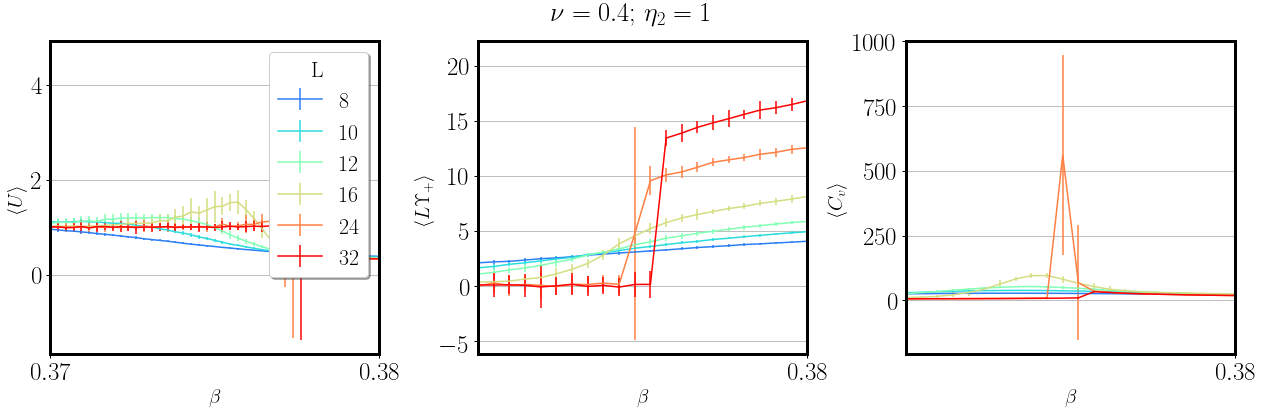

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


e=0
nu=0.4
h=1
rho=1
eta1=0
eta2=1
blow=0.37
bhigh=0.385
nMAX=30

LLIST=[8, 10, 12, 16, 24, 32]
       #, 24, 32]

BASEDIR=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures")

fig, ax1 = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,6))
fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$\langle U \rangle$")
ax1[1].set_ylabel(r"$\langle L\Upsilon_{+} \rangle$")
ax1[2].set_ylabel(r"$\langle C_v \rangle$")
xticks = np.arange(0.37, 0.385, 0.01)
ax1[0].set_xlim((0.375,0.38))
ax1[0].set_xticks(xticks)
ax1[0].grid()
ax1[1].grid()
ax1[2].grid()

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L, rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
       
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)
    
ax1[0].legend(loc="best", title="L")
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh) )



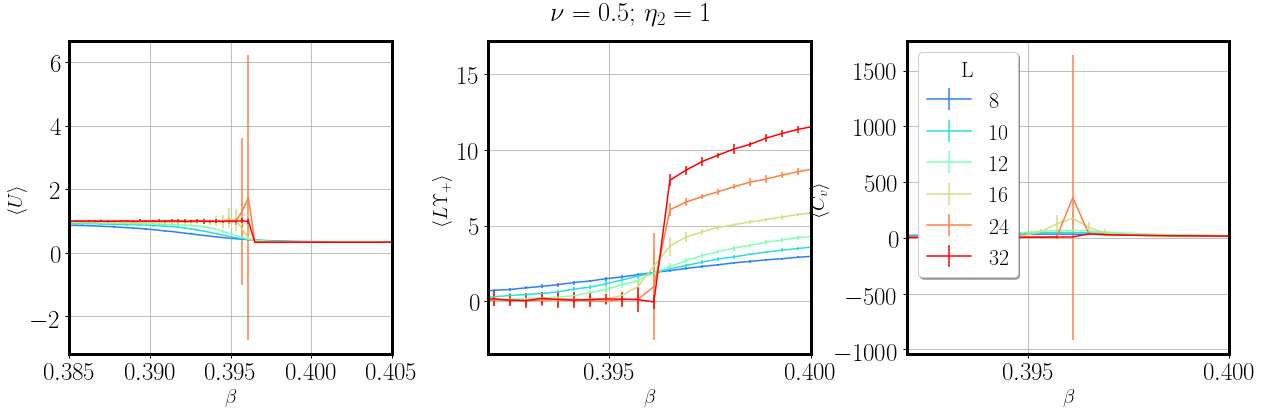

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


e=0
nu=0.5
h=1
rho=1
eta1=0
eta2=1
blow=0.385
bhigh=0.41
nMAX=30

LLIST=[8, 10, 12, 16, 24, 32]

BASEDIR=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures")

fig, ax1 = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,6))
fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$\langle U \rangle$")
ax1[1].set_ylabel(r"$\langle L\Upsilon_{+} \rangle$")
ax1[2].set_ylabel(r"$\langle C_v \rangle$")
#xticks = np.arange(0.385, 0.41, 0.005)
ax1[0].set_xlim((0.392,0.4))
ax1[1].set_xlim((0.392,0.4))
ax1[2].set_xlim((0.392,0.4))

ax1[0].set_xticks(xticks)
ax1[0].grid()
ax1[1].grid()
ax1[2].grid()

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L, rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
       
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)
    
ax1[2].legend(loc="best", title="L")
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh) )



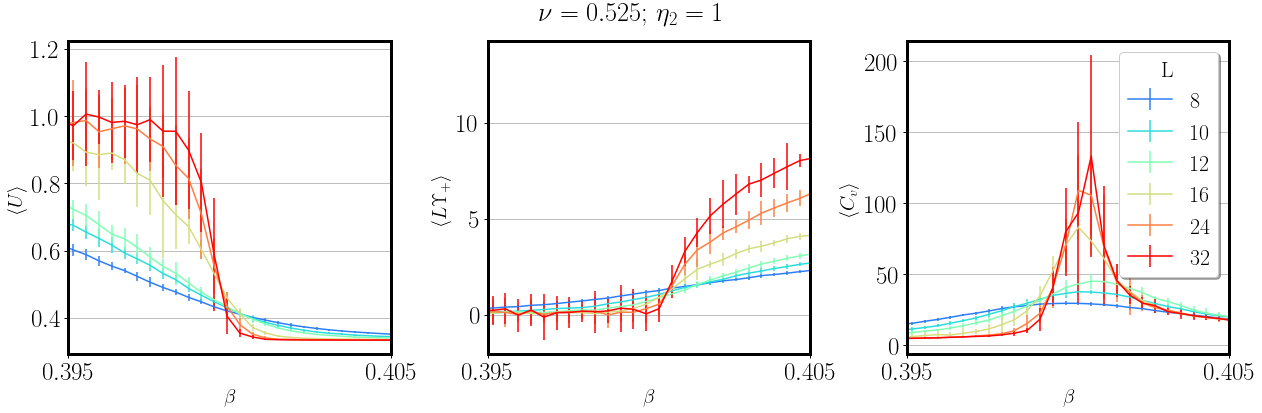

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


e=0
nu=0.525
h=1
rho=1
eta1=0
eta2=1
blow=0.39
bhigh=0.415
nMAX=30

LLIST=[8, 10, 12, 16, 24, 32]

BASEDIR=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures")

fig, ax1 = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,6))
fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$\langle U \rangle$")
ax1[1].set_ylabel(r"$\langle L\Upsilon_{+} \rangle$")
ax1[2].set_ylabel(r"$\langle C_v \rangle$")
ax1[0].set_xlim((0.395,0.405))
xticks = np.arange(0.395, 0.405, 0.01)
ax1[0].set_xticks(xticks)
ax1[0].grid()
ax1[1].grid()
ax1[2].grid()

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L, rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
       
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)
    
ax1[2].legend(loc="best", title="L")
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh) )



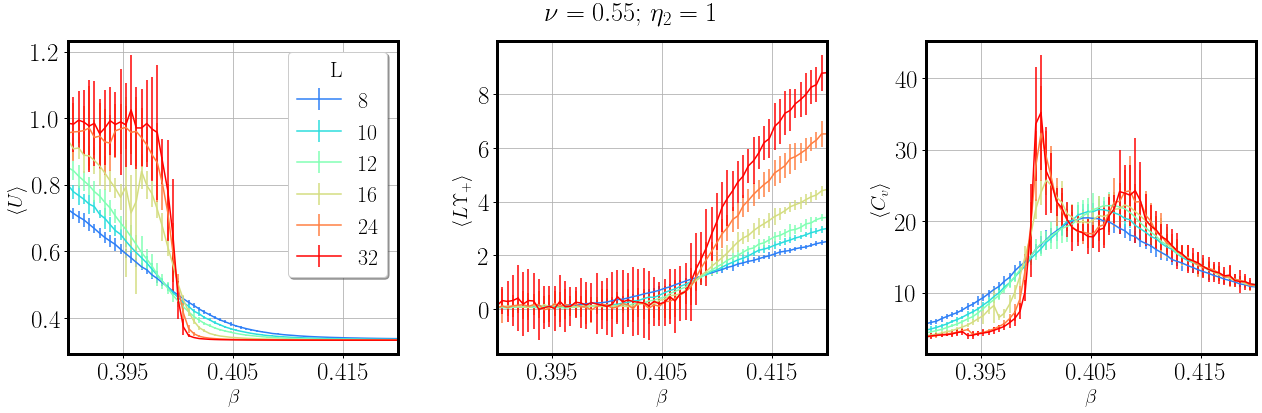

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


e=0
nu=0.55
h=1
rho=1
eta1=0
eta2=1
blow=0.39
bhigh=0.42
nMAX=30

LLIST=[8, 10, 12, 16, 24, 32]

BASEDIR=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures")

fig, ax1 = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,6))
fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$\langle U \rangle$")
ax1[1].set_ylabel(r"$\langle L\Upsilon_{+} \rangle$")
ax1[2].set_ylabel(r"$\langle C_v \rangle$")
ax1[0].grid()
ax1[1].grid()
ax1[2].grid()
xticks = np.arange(0.385, 0.42, 0.01)
ax1[0].set_xticks(xticks)
ax1[0].set_xlim((0.39,0.42))

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L, rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
       
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)
    
ax1[0].legend(loc="best", title="L")
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh) )



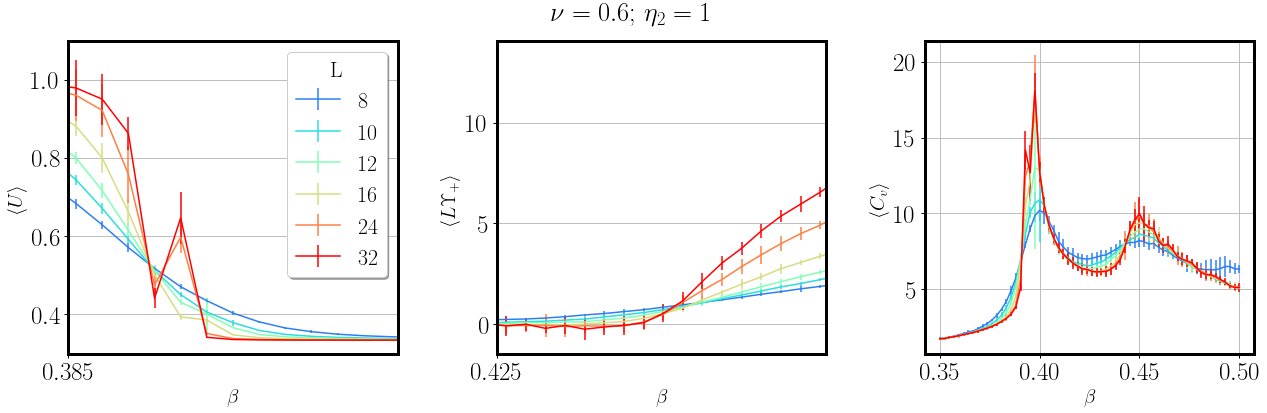

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


e=0
nu=0.6
h=1
rho=1
eta1=0
eta2=1
blow=0.35
bhigh=0.5
nMAX=30

LLIST=[8, 10, 12, 16, 24, 32]

BASEDIR=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures")

fig, ax1 = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(18,6))
fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$\langle U \rangle$")
ax1[1].set_ylabel(r"$\langle L\Upsilon_{+} \rangle$")
ax1[2].set_ylabel(r"$\langle C_v \rangle$")
ax1[0].set_xlim((0.385,0.415))
xticks = np.arange(0.385, 0.415, 0.05)
ax1[0].set_xticks(xticks)
ax1[1].set_xlim((0.425,0.465))
xticks = np.arange(0.425, 0.465, 0.05)
ax1[1].set_xticks(xticks)
ax1[0].grid()
ax1[1].grid()
ax1[2].grid()

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L, rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
       
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)
    
ax1[0].legend(loc="best", title="L")
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh) )



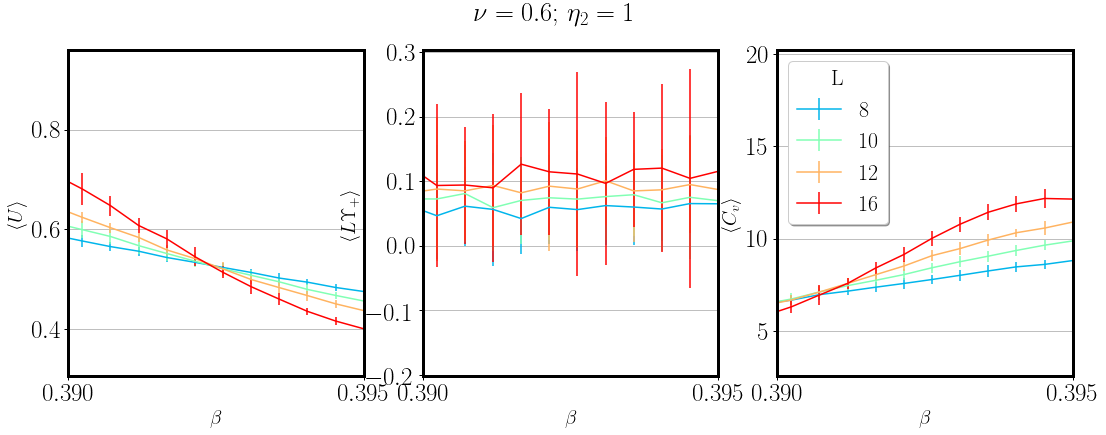

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


e=0
nu=0.6
h=1
rho=1
eta1=0
eta2=1
blow=0.385
bhigh=0.415
nMAX=30

LLIST=[8, 10, 12, 16]
#, 24, 32]

BASEDIR=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures")

fig, ax1 = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,6))
fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$\langle U \rangle$")
ax1[1].set_ylabel(r"$\langle L\Upsilon_{+} \rangle$")
ax1[2].set_ylabel(r"$\langle C_v \rangle$")
ax1[0].set_xlim((0.39,0.395))
xticks = np.arange(0.39, 0.395, 0.005)
ax1[0].set_xticks(xticks)
ax1[0].grid()
ax1[1].grid()
ax1[2].grid()

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L, rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
       
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    ax1[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m)
    ax1[2].errorbar(beta, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)
    
ax1[2].legend(loc="best", title="L")
#fig.tight_layout()
#fig.subplots_adjust(wspace=0.3, top=0.9)
#fig.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh) )



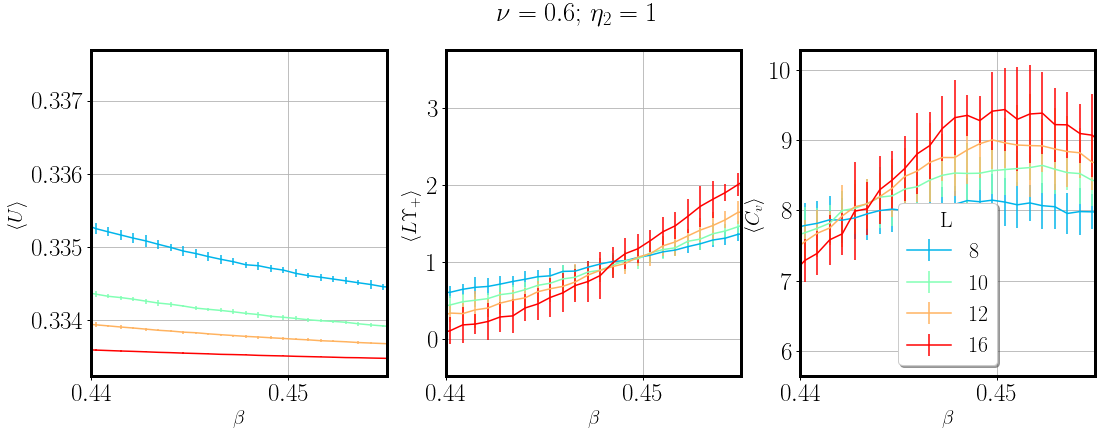

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


e=0
nu=0.6
h=1
rho=1
eta1=0
eta2=1
blow=0.425
bhigh=0.465
nMAX=30

LLIST=[8, 10, 12, 16]
#, 24, 32]

BASEDIR=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures")

fig, ax1 = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,6))
fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$\langle U \rangle$")
ax1[1].set_ylabel(r"$\langle L\Upsilon_{+} \rangle$")
ax1[2].set_ylabel(r"$\langle C_v \rangle$")
ax1[0].set_xlim((0.44,0.455))
xticks = np.arange(0.44, 0.455, 0.01)
ax1[0].set_xticks(xticks)
ax1[0].grid()
ax1[1].grid()
ax1[2].grid()

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L, rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
       
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    ax1[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m)
    ax1[2].errorbar(beta, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)
    
ax1[2].legend(loc="best", title="L")
#fig.tight_layout()
#fig.subplots_adjust(wspace=0.3, top=0.9)
#fig.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh) )



In [118]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


e=0
nu=0.65
h=1
rho=1
eta1=0
eta2=1
blow=0.375
bhigh=0.395
nMAX=30

LLIST=[8, 10, 12, 16, 24, 32]

BASEDIR=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures")

fig, ax1 = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,6))
fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$\langle U \rangle$")
ax1[1].set_ylabel(r"$\langle L\Upsilon_{+} \rangle$")
ax1[2].set_ylabel(r"$\langle C_v \rangle$")
#ax1[0].set_xlim((0.375,0.395))
#xticks = np.arange(0.375, 0.395, 0.01)
#ax1[0].set_xticks(xticks)
#ax1[1].set_xlim((0.51,0.54))
#xticks = np.arange(0.51, 0.54, 0.05)
#ax1[1].set_xticks(xticks)
ax1[0].grid()
ax1[1].grid()
ax1[2].grid()

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L, rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
       
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)

#ax1[2].legend(loc="best", title="L")
#fig.tight_layout()
#fig.subplots_adjust(wspace=0.3, top=0.9)
#fig.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh) )



IndexError: index out of range

<Figure size 1296x432 with 3 Axes>

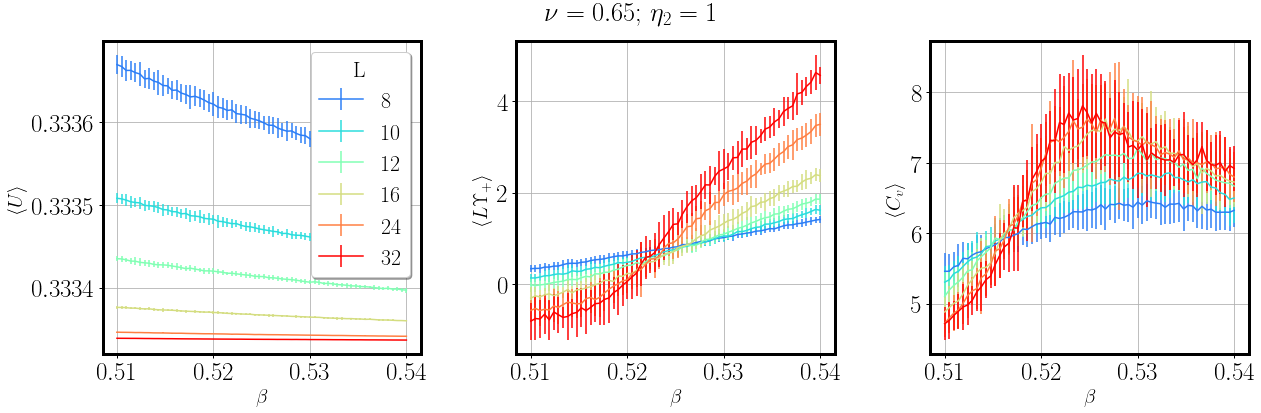

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


e=0
nu=0.65
h=1
rho=1
eta1=0
eta2=1
blow=0.51
bhigh=0.54
nMAX=30

LLIST=[8, 10, 12, 16, 24, 32]

BASEDIR=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures")

fig, ax1 = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(18,6))
fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$\langle U \rangle$")
ax1[1].set_ylabel(r"$\langle L\Upsilon_{+} \rangle$")
ax1[2].set_ylabel(r"$\langle C_v \rangle$")
#ax1[0].set_xlim((0.38,0.395))
#xticks = np.arange(0.38, 0.395, 0.05)
#ax1[0].set_xticks(xticks)
#ax1[1].set_xlim((0.51,0.54))
#xticks = np.arange(0.51, 0.54, 0.05)
#ax1[1].set_xticks(xticks)
ax1[0].grid()
ax1[1].grid()
ax1[2].grid()

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L, rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
       
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)
    
ax1[0].legend(loc="best", title="L")
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh) )

